# WiDS Datathon 2020

## Group:
* Adriana 
* Camila
* Michele
* Luiz

File descriptions

* training_v2.csv - the training data. You should see 91,713 encounters represented here. Please view the WiDS Datathon 2020 Dictionary file for more information about the columns.

* unlabeled.csv - the data without hospital_death provided. You are being asked to predict the hospital_death variable for these encounters.


* samplesubmission.csv - a sample submission file in the correct format


* solution_template.csv - a list of all the rows (and encounters) that should be in your submissions


* WiDS Datathon 2020 Dictionary.csv - supplemental information about the data

## Part I - Loading the files and importing the libraries

In [1]:
# First, let's import the Python libraries that we will need to solve this problem

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import missingno as msno
from scipy import stats
import re
import statistics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Let's have a look in the provided files:

In [4]:
# I will set the option to display all the columns of the dataset
pd.set_option('display.max_columns', None) 

In [5]:
dictionary = pd.read_csv('widsdatathon2020/WiDS Datathon 2020 Dictionary.csv')

In [6]:
dictionary.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example,Entra no modelo,Sugestões,Valor de referência,Referência,Unnamed: 10,Unnamed: 11
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None,N,NaN,NaN,NaN,NaN,NaN
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None,?,Verificar qual a quantidade de hospitais difer...,NaN,NaN,NaN,NaN
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None,N,NaN,NaN,NaN,NaN,NaN
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0,TARGET,NaN,NaN,NaN,NaN,NaN
4,demographic,age,Years,numeric,The age of the patient on unit admission,None,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
template = pd.read_csv('widsdatathon2020/solution_template.csv')
template.head()

,encounter_id,hospital_death
0,2,NaN
1,5,NaN
2,7,NaN
3,8,NaN
4,10,NaN


In [8]:
submission = pd.read_csv('widsdatathon2020/samplesubmission.csv')
submission.head()

,encounter_id,hospital_death
0,2,0.500
1,5,0.200
2,7,0.001


In [9]:
# We will have to use the data from the unlabeled file to predict the hospital_death index

In [10]:
unlabeled = pd.read_csv('widsdatathon2020/unlabeled.csv')
unlabeled.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

In [11]:
unlabeled.shape

(39308, 186)

In [12]:
# We will use the file training_v2.csv to train our machine learning model.

In [13]:
df0=pd.read_csv('widsdatathon2020/training_v2.csv')
df = df0.copy()

In [14]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [15]:
df.shape

(91713, 186)

## Part II - EDA (Exploratory Data Analysis)

### Missing values

In [16]:
# Let's check how many null values there are in df:

# source: Kaggle Gabriel Preda
#https://www.kaggle.com/gpreda/santander-eda-and-prediction

In [17]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [18]:
%time
missing_data(df)

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 5.01 µs


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
Total,0,0,0,0,4228,3429,0,1395,25,1334,21409,112,0,0,0,0,0,2720,54379,1662,1101,0,715,58134,19262,18853,70868,1901,1901,1037,1901,11036,878,19878,715,994,70868,70868,70868,70868,1234,18600,4108,48998,715,22012,67984,67984,165,165,1040,1040,145,145,67777,67777,220,220,1479,1479,385,385,333,333,67959,67959,159,159,1027,1027,2324,2324,74928,74928,3619,3619,7350,7350,2790,2790,74844,74844,4639,4639,9084,9084,4357,4357,4185,4185,74915,74915,3611,3611,7341,7341,21732,21732,49096,49096,53673,53673,10514,10514,13069,13069,10169,10169,5807,5807,15071,15071,12147,12147,11654,11654,57941,57941,68396,68396,13444,13444,9585,9585,10195,10195,13174,13174,83824,83824,84619,84619,75091,75091,75863,75863,74957,74957,52614,52614,76094,76094,73123,73123,73420,73420,57941,57941,84369,84369,75673,75673,72102,72102,72617,72617,75953,75953,59271,59271,60123,60123,59262,59262,66008,66008,75959,75959,76424,76424,75945,75945,80195,80195,7947,7947,715,715,715,715,715,715,715,715,1662,1662
Percent,

In [19]:
# We can also visualize the missing data using missingno

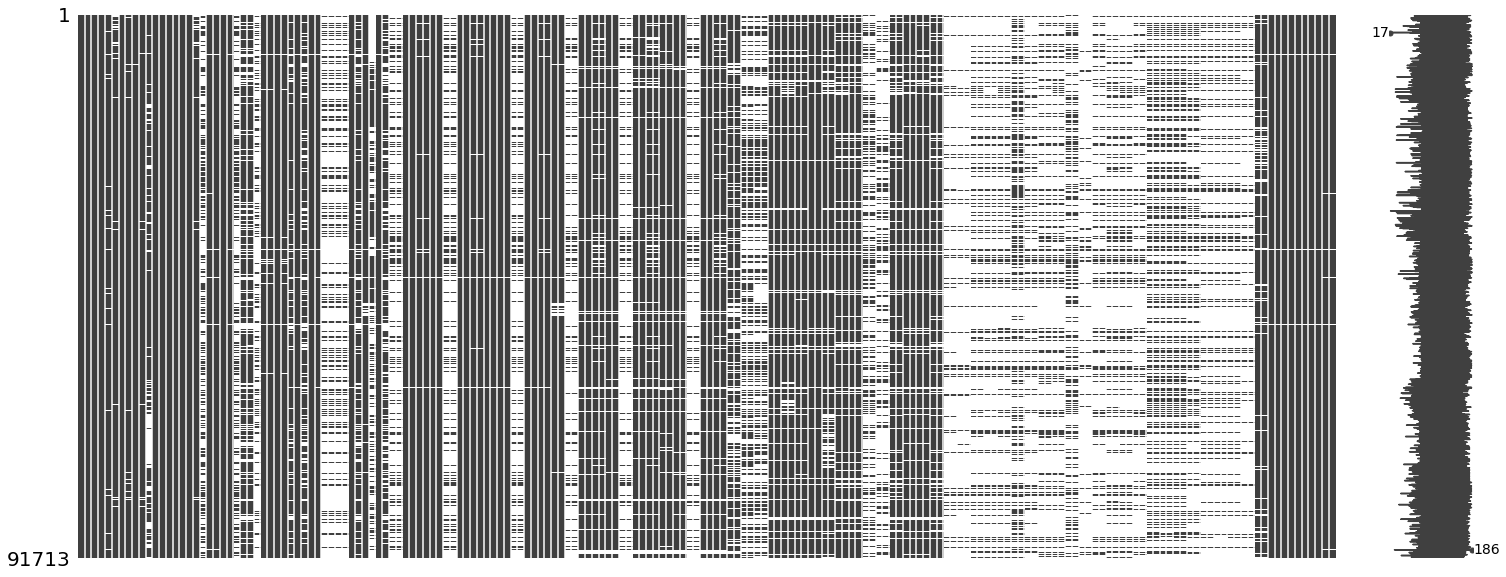

In [20]:
%matplotlib inline
msno.matrix(df)

In [21]:
# But as we have a big quantity of features, this visualization is not so nice.

In [22]:
# It seems that there is a big amount of variables with null values. How will we deal with them?

### Data description

In [23]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

### Is the data balanced?

In [24]:
# Let's verifity if the date is balanced in terms of the target (hospital_death)

In [25]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [26]:
perc_0 = 100*(sum(df['hospital_death']==0))/df.shape[0]
perc_1 = 100*(sum(df['hospital_death']==1))/df.shape[0]
print ('Percentage of 0 = ',perc_0)
print ('Percentage of 1 = ', perc_1)

Percentage of 0 =  91.36981671082616
Percentage of 1 =  8.630183289173836


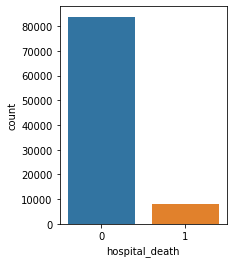

In [27]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = df['hospital_death'], data = df)

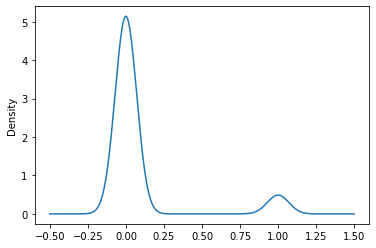

In [28]:
df['hospital_death'].sample(1000,random_state=42).plot.kde()

In [29]:
# The data is very unbalanced as the percentage of death (1) is much lower than 'not death'(0) (hopefully!)

In [30]:
# We will deal with that later. Let's continue with our EDA

### Correlation with the target

In [31]:
# Which are the most correlated features with the target?

In [32]:
corrmat = df.corr()['hospital_death'].sort_values(ascending = False)
 

In [33]:
corrmat [0:40]

hospital_death                   1.000000
d1_lactate_min                   0.403614
d1_lactate_max                   0.399029
h1_lactate_min                   0.344046
h1_lactate_max                   0.340951
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
ventilated_apache                0.228661
fio2_apache                      0.212249
h1_inr_max                       0.198641
d1_inr_max                       0.198641
d1_bun_max                       0.186558
bun_apache                       0.181435
d1_bun_min                       0.181383
d1_inr_min                       0.175804
h1_inr_min                       0.175804
intubated_apache                 0.173139
h1_bun_max                       0.167097
h1_bun_min                       0.166719
d1_heartrate_max                 0.162934
d1_wbc_max                       0.143862
d1_bilirubin_max                 0.139200
bilirubin_apache                 0.137464
wbc_apache                       0

In [34]:
# 20  most positive correlated features with the target

In [35]:
corrmat = df.corr()
cols = corrmat.nlargest(21,'hospital_death')['hospital_death'].index
cols

Index(['hospital_death', 'd1_lactate_min', 'd1_lactate_max', 'h1_lactate_min',
       'h1_lactate_max', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'ventilated_apache', 'fio2_apache',
       'd1_inr_max', 'h1_inr_max', 'd1_bun_max', 'bun_apache', 'd1_bun_min',
       'd1_inr_min', 'h1_inr_min', 'intubated_apache', 'h1_bun_max',
       'h1_bun_min', 'd1_heartrate_max', 'd1_wbc_max'],
      dtype='object')

In [36]:
# 20 most negative correlated features with the target

In [37]:
cols_negative = corrmat.nsmallest(20,'hospital_death')['hospital_death'].index
cols_negative

Index(['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache',
       'd1_sysbp_invasive_min', 'd1_arterial_ph_min', 'h1_albumin_min',
       'h1_albumin_max', 'd1_mbp_invasive_min', 'd1_sysbp_min', 'd1_spo2_min',
       'd1_sysbp_noninvasive_min', 'h1_arterial_ph_max', 'd1_temp_min',
       'ph_apache', 'd1_albumin_min', 'h1_arterial_ph_min',
       'd1_mbp_noninvasive_min', 'd1_mbp_min', 'albumin_apache',
       'd1_diasbp_noninvasive_min'],
      dtype='object')

### Pairplot

In [38]:
# 10 most positive correlated features with the target

/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


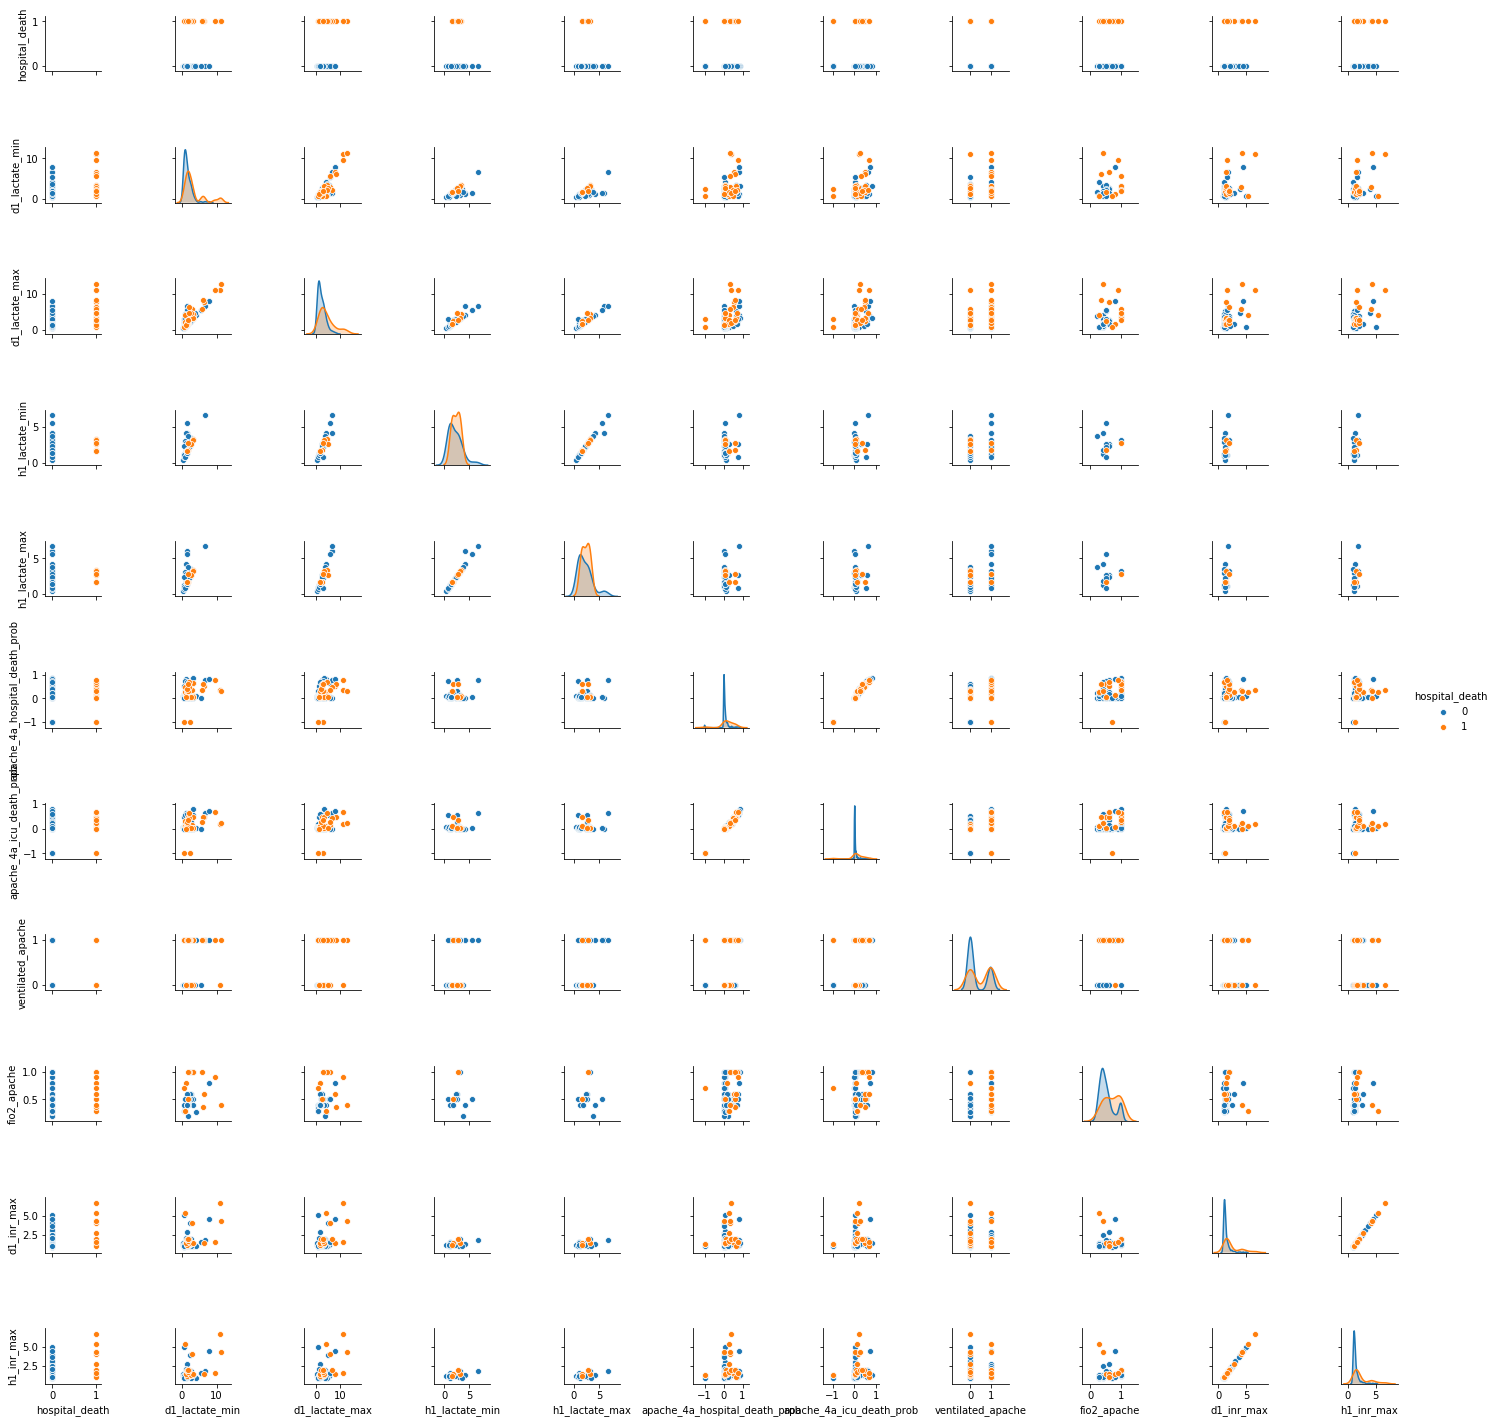

In [39]:
sns.pairplot(data = df[['hospital_death', 'd1_lactate_min', 'd1_lactate_max', 'h1_lactate_min',
       'h1_lactate_max', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'ventilated_apache', 'fio2_apache',
       'd1_inr_max', 'h1_inr_max']].sample(500, random_state =42), height=1.8, hue = 'hospital_death')

In [40]:
# 10 most negative correlated features with the target

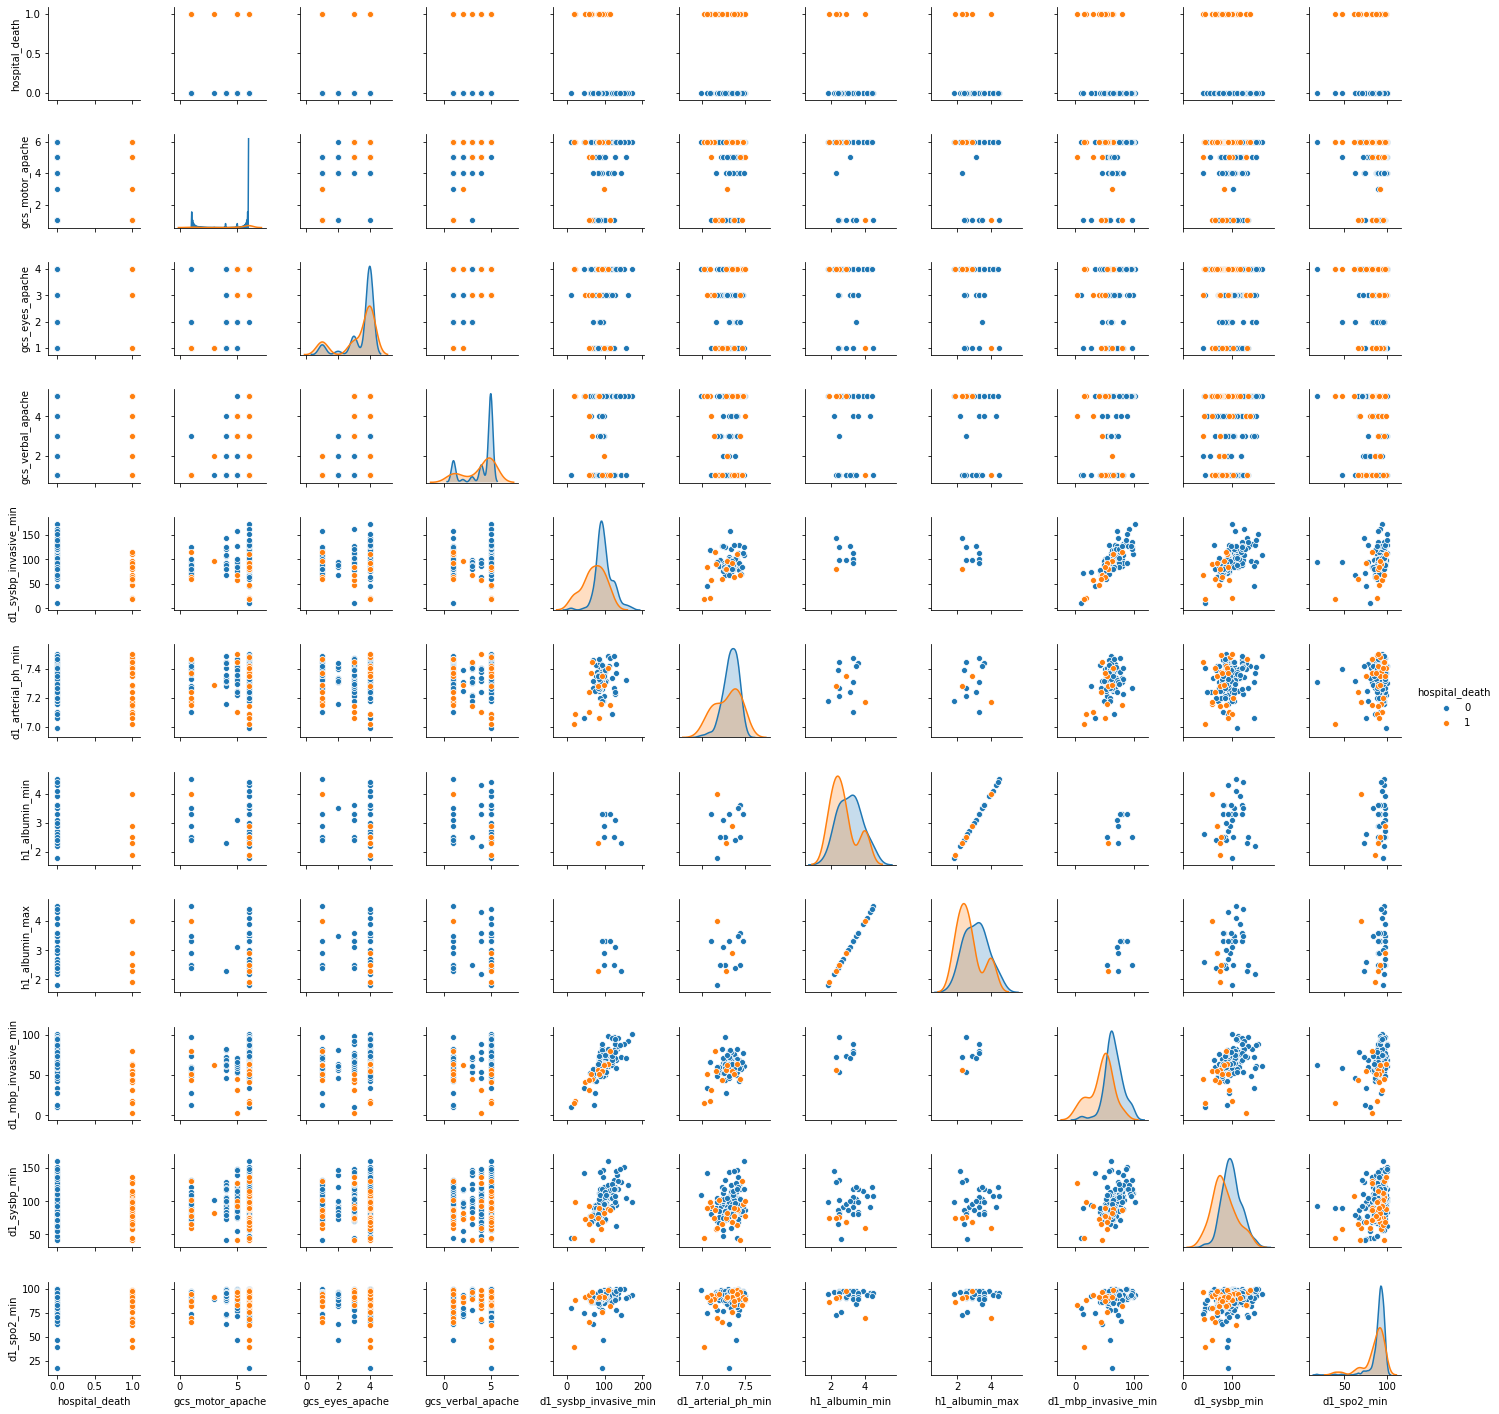

In [41]:
sns.pairplot(data = df[['hospital_death', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache',
       'd1_sysbp_invasive_min', 'd1_arterial_ph_min', 'h1_albumin_min',
       'h1_albumin_max', 'd1_mbp_invasive_min', 'd1_sysbp_min', 'd1_spo2_min']].sample(500, random_state =42), height=1.8, hue = 'hospital_death')

In [42]:
# features that draw the atention:
# d1_lactate_max
# apache_4a_hospital_death_prob
# fio2_apache
# d1_sysbp_invasive_min
# h1_albumin_min
# h1_albumin_max
# d1_mbp_invasive_min
# d1_sysbp_min

# We can see that the distribution curve of these feature are quite diffent between the patients that survived 
# and the ones that passed away

In [43]:
# Moreover, we can see some collinearity between variables, such as:
# d1_lactate_max and d1_lactate_min
# d1_inr_max and h1_inr_max

### Age

#### General

/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2271.,  2981.,  3538.,  5314.,  8002., 11824., 15944., 14264.,
        12670., 10677.]),
 array([16. , 23.3, 30.6, 37.9, 45.2, 52.5, 59.8, 67.1, 74.4, 81.7, 89. ]),
 <a list of 10 Patch objects>)

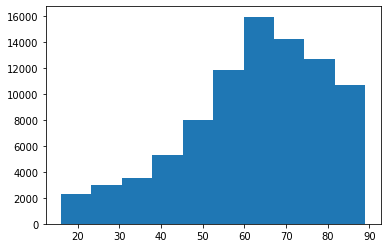

In [44]:
plt.hist(df.age)

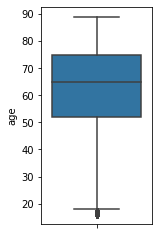

In [45]:
f, ax = plt.subplots(figsize =(2,4))
ax = sns.boxplot( y=df['age'])

In [46]:
df['age'].mean()

62.309515917014345

In [47]:
df['age'].median()

65.0

#### Comparing the age between hospital_death = 0 or 1

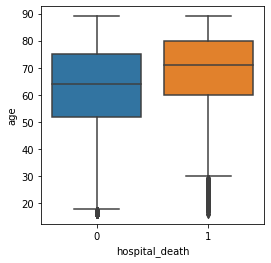

In [48]:
f, ax = plt.subplots(figsize =(4,4))
ax = sns.boxplot(x=df['hospital_death'], y=df['age'])

/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


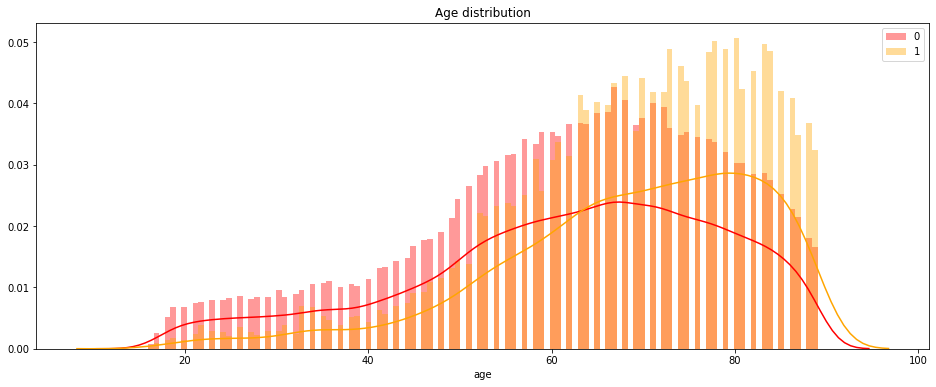

In [49]:
plt.figure(figsize=(16,6))
plt.title('Age distribution')
sns.distplot(df[df['hospital_death']==0]['age'],color="red", kde=True,bins=120, label='0')
sns.distplot(df[df['hospital_death']==1]['age'],color="orange", kde=True,bins=120, label='1')
plt.legend()
plt.show()

In [50]:
df[df['hospital_death']==0]['age'].describe()

count    80212.000000
mean        61.748741
std         16.860137
min         16.000000
25%         52.000000
50%         64.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

In [51]:
df[df['hospital_death']==0]['age'].median()

64.0

In [52]:
df[df['hospital_death']==1]['age'].describe()

count    7273.000000
mean       68.494156
std        14.428363
min        16.000000
25%        60.000000
50%        71.000000
75%        80.000000
max        89.000000
Name: age, dtype: float64

In [53]:
df[df['hospital_death']==1]['age'].median()

71.0

In [54]:
# It seems that when hospital_death is equal to 1, the age curve is skeewed to the right
# It looks like that people that have died are older on average. Is this statistally significant?

In [55]:
# Let's run a z test, excluding the Null values:

In [56]:
# H0: the age of people who died  = age of people who passed away
# H1: the ages are different

In [57]:
df_age = df[['age','hospital_death']].dropna()

In [58]:
death_age_mean = df_age[df_age['hospital_death']==1]['age'].mean()
death_age_std = df_age[df_age['hospital_death']==1]['age'].std()
n_death = df_age[df_age['hospital_death']==1].shape[0]

print(death_age_mean, death_age_std, n_death)

68.4941564691324 14.42836331652578 7273


In [59]:
survival_age_mean = df_age[df_age['hospital_death']==0]['age'].mean()
survival_age_std = df_age[df_age['hospital_death']==0]['age'].std()
n_survival = df_age[df_age['hospital_death']==0].shape[0]

print(survival_age_mean, survival_age_std, n_survival)

61.748740836782524 16.860137295694283 80212


In [60]:
# Standard Error

S = math.sqrt(((death_age_std)**2/n_death) + ((survival_age_std**2)/n_survival))
S

0.17935235565267332

In [61]:
# t value

t = (death_age_mean - survival_age_mean)/S
t

37.60985244828781

In [62]:
# Degrees of freedom 
d_freedom = n_death+n_survival - 2 
d_freedom

87483

In [63]:
# According to the t-test table, with p probabiblity of 0.025 (bicaudal test), 
# and degrees of freedom higher than 1000, critical t = +- 1,960 .
# As the calculated t value is higher than critical t, we can reject the null hypothesis 
## So the ages of people who passed away are statistically different from the ages of people who survived
##  with a significance level of 95%.

In [64]:
### t-test using scipy

In [65]:
t2, p2 = stats.ttest_ind(df_age[(df_age['hospital_death']==0)],df_age[(df_age['hospital_death']==1)], equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))

# I used the argument equal_var = False, because the samples have different variances

t_scipy = [-37.60985245         -inf]
p_scipy = [5.05885239e-288 0.00000000e+000]


In [66]:
# t calculated by scipy is almost the same as I calculated before. 
# As the p_value < 0.05, we can reject the null hypothesis  (as we have already concluded before! )

#### Treating missing values

In [67]:
# How many values of age are missing for the people who survived and for the ones who passed away?

In [68]:
df[(df['hospital_death']==1)]['age'].isnull().sum()

642

In [69]:
# Percentage

In [70]:
100*(df[(df['hospital_death']==1)]['age'].isnull().sum()/df[(df['hospital_death']==1)]['age'].shape[0])

8.111181301326594

In [71]:
df[(df['hospital_death']==0)]['age'].isnull().sum()

3586

In [72]:
# Percentage

In [73]:
100*(df[(df['hospital_death']==0)]['age'].isnull().sum()/df[(df['hospital_death']==0)]['age'].shape[0])

4.279338409031242

In [74]:
total_perc = 100*(df[(df['hospital_death']==1)]['age'].isnull().sum() + df[(df['hospital_death']==0)]['age'].isnull().sum())/df.shape[0]
total_perc 

4.61003347398951

 Ideas:


- drop the rows where age = NaN : I believe it will be a problem, because 4,6% is quite a significative 
percentage to eliminate from the dataset. Moreover, the percentage of people who passed away with missing 
values is 8,11% and there are fewer values (remember that we are dealing with a very unbalanced dataset)

- impute data according to the hospital_death result (if 0: impute age = survival_age_mean
                                                      if 1: impute age = death_age_mean)     
 Maybe I would include bias in the data? Not a good idea...


In [76]:
# I will substitute the NaN values of age for the median (global). I will do that later with other features, if
# necessary

In [77]:
age_median = df['age'].median()
age_median 

65.0

### BMI - Body Mass Index

In [78]:
# BMI = weight in kg/ (height in m)²

(array([ 7611., 24199., 26637., 15669.,  7378.,  3413.,  1537.,   751.,
          431.,   658.]),
 array([14.84492591, 20.14193229, 25.43893867, 30.73594506, 36.03295144,
        41.32995782, 46.6269642 , 51.92397058, 57.22097697, 62.51798335,
        67.81498973]),
 <a list of 10 Patch objects>)

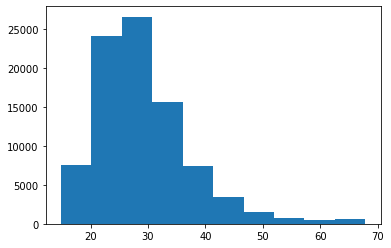

In [79]:
plt.hist(df.bmi)

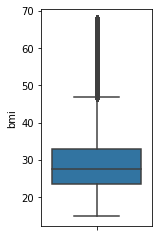

In [80]:
f, ax = plt.subplots(figsize =(2,4))
ax = sns.boxplot( y=df['bmi'])

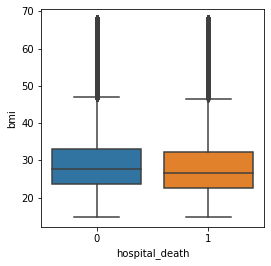

In [81]:
f, ax = plt.subplots(figsize =(4,4))
ax = sns.boxplot(x=df['hospital_death'], y=df['bmi'])

/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


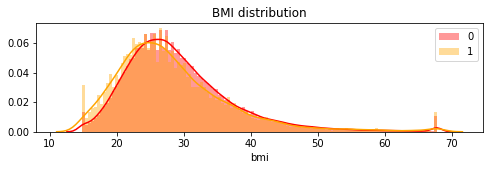

In [82]:
plt.figure(figsize=(8,2))
plt.title('BMI distribution')
sns.distplot(df[df['hospital_death']==0]['bmi'],color="red", kde=True,bins=120, label='0')
sns.distplot(df[df['hospital_death']==1]['bmi'],color="orange", kde=True,bins=120, label='1')
plt.legend()
plt.show()

In [83]:
# Except for the outliers (very high numbers), the BMI curve looks as a normal curve. We can tell there is not
# much difference between the distribution of people who survived and the ones who passed away.

In [84]:
# According to the WHO (World Health Organization),  the goal for individuals should be to maintain body mass index in 
# the range 18.5 to 24.9 kg/m2. 
# There is increased risk of co-morbidities for body mass index 25.0 to 29.9, and moderate to severe 
# risk of co-morbidities for body mass index greater than 30
## Source: https://www.who.int/gho/ncd/risk_factors/bmi_text/en/

In [85]:
# My first idea was to use the reference value for BMI to impute the missing values, however I realized that 
# the mean and median of the dataset is higher than the 'healthy_bmi'. Therefore, I will use the median.

In [86]:
bmi_median= df['bmi'].median()

In [87]:
# Are weight and high relevant? As we have the BMI maybe we could leave height and weight out of our model?

### Analysis of the patients who passed away

In [88]:
df[(df['hospital_death']==1)]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,114,admit,CCU-CTICU,0.009028,0,NaN,2.7,116.0,103.01,0,0.0,0.2,15.0,1.16,1.0,4.0,6.0,0.0,5.0,380.0,82.0,37.9,0.0,66.0,60.0,60.0,92.0,7.14,14.0,142.0,36.9,NaN,1.0,24.70,64.0,52.0,65.0,59.0,65.0,59.0,82.0,82.0,72.0,66.0,93.0,71.0,93.0,71.0,24.0,19.0,97.0,97.0,94.0,72.0,104.0,98.0,104.0,98.0,36.9,36.9,64.0,52.0,65.0,59.0,65.0,59.0,82.0,82.0,72.0,66.0,93.0,71.0,93.0,71.0,24.0,19.0,97.0,97.0,94.0,72.0,104.0,98.0,104.0,98.0,36.9,36.9,2.7,2.7,0.2,0.2,15.0,15.0,7.3,7.3,1.16,1.16,365.0,288.0,23.0,23.0,12.3,12.3,37.9,37.9,1.200,1.200,5.9,5.9,226.0,226.00,5.2,5.2,142.0,142.0,24.70,24.70,2.7,2.7,0.2,0.2,15.0,15.0,7.3,7.3,1.16,1.16,365.0,365.0,23.0,23.0,12.3,12.3,37.9,37.9,1.200,1.200,5.9,5.9,226.0,226.0,5.2,5.2,142.0,142.0,24.70,24.7000,60.0,33.0,7.62,6.99,256.0,92.0,92.0,92.000000,60.0,60.0,7.14,7.14,92.0,92.0,92.0,92.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
25,29208,114628

In [89]:
%time
missing_data(df[(df['hospital_death']==1)])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
Total,0,0,0,0,642,363,0,105,8,190,1744,12,0,0,0,0,0,241,3758,136,129,0,85,4152,1447,1452,4203,329,329,127,329,841,106,1580,85,124,4203,4203,4203,4203,123,1372,559,4708,85,1772,4922,4922,31,31,109,109,20,20,4892,4892,29,29,129,129,45,45,50,50,4917,4917,31,31,108,108,318,318,6647,6647,282,282,470,470,206,206,6616,6616,347,347,563,563,339,339,373,373,6640,6640,281,281,470,470,2016,2016,3210,3210,3675,3675,840,840,1070,1070,854,854,463,463,1181,1181,963,963,954,954,3848,3848,3894,3894,1093,1093,795,795,783,783,1081,1081,6790,6790,6900,6900,6105,6105,6206,6206,6100,6100,4177,4177,6182,6182,5969,5969,6044,6044,3848,3848,6595,6595,6255,6255,5819,5819,5831,5831,6285,6285,2652,2652,2781,2781,2648,2648,3480,3480,5651,5651,5718,5718,5650,5650,6240,6240,552,552,85,85,85,85,85,85,85,85,136,136
Percent,0,0,0,0,8.11118,4.58623,0,1.3266,0.101074,2.40051,22.0341,0.151611,0,0,0,0,0,3.04485,47.4795,1.71826,1.62982,0,1.07391,52.4574,18.2817,18.3449,53.1017,4.15666,4.15666,1.60455,4.15666,1

### Strategy to treat the missing values

#### Nan values mean no disease (0)

In [90]:
# Let's assume that if any of the diagnosis bellow is Nan, the patient doesn't have the disease

In [91]:
diagnosis=['aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma',
          'solid_tumor_with_metastasis']

In [92]:
for i in diagnosis:
    df[i].fillna(0, inplace=True)

#### Ethnicity: Nan will be considered as Other/Unknown

In [93]:
df.ethnicity.value_counts(dropna = False)

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
NaN                  1395
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [94]:
df['ethnicity'].fillna('Other/Unknown', inplace=True)

####  Gender: Nan values replaced by the most frequent category

In [95]:
df.gender.value_counts()

M    49469
F    42219
Name: gender, dtype: int64

In [96]:
df['gender'].fillna('M', inplace=True)

#### GCS_eyes, motor and verbal_apache: Nan values replaced by the most 'healthy' category

In [97]:
df.gcs_eyes_apache.value_counts(dropna = False)

4.0    62995
3.0    13863
1.0     8274
2.0     4680
NaN     1901
Name: gcs_eyes_apache, dtype: int64

In [98]:
df['gcs_eyes_apache'].fillna(4.0, inplace=True)

In [99]:
df.gcs_motor_apache.value_counts(dropna = False)

6.0    70960
5.0     7982
1.0     5543
4.0     4494
NaN     1901
3.0      524
2.0      309
Name: gcs_motor_apache, dtype: int64

In [100]:
df['gcs_motor_apache'].fillna(6.0, inplace=True)

In [101]:
df.gcs_verbal_apache.value_counts(dropna=False)

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
NaN     1901
Name: gcs_verbal_apache, dtype: int64

In [102]:
df['gcs_verbal_apache'].fillna(5.0, inplace=True)

#### Exclusion of rows with probability <0

In [103]:
# We realized that apache_4a_hospital_death_prob and apache_4a_icu_death_prob have negative probabilities,
# which doesn't make sense:

In [104]:
df[['apache_4a_hospital_death_prob','apache_4a_icu_death_prob']].describe()

,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,83766.000000,83766.000000
mean,0.086787,0.043955
std,0.247569,0.217341
min,-1.000000,-1.000000
25%,0.020000,0.010000
50%,0.050000,0.020000
75%,0.130000,0.060000
max,0.990000,0.970000


In [105]:
 df[(df['apache_4a_hospital_death_prob']<0)| (df['apache_4a_icu_death_prob']<0) ]['hospital_death'].value_counts()

0    2444
1     248
Name: hospital_death, dtype: int64

In [106]:
# I will consider only the rows of the dataset where apache_4a_hospital_death_prob and 
# apache_4a_icu_death_prob >=0

In [107]:
df = df[(df['apache_4a_hospital_death_prob']>=0)& (df['apache_4a_icu_death_prob']>=0) ].copy()

#### Analysis of similar values and exclusion of the ones with high % of missing

In [108]:
# I realized that are many similar features. I will agreggate them according to the type of exam

In [109]:
column_names = list(df.columns)
column_names

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m

In [110]:
'''This function agreggates the variable names that have similar description'''

def test_similar_columns (feature):
    for i in column_names:
        txt = i
        x = re.search(feature, txt)
        if x is not None:
            #print(x) #this will print an object 
            print(txt)
    print(30*'*')
        

In [111]:
key_words = ['albumin','bilirubin','bun','creatinine','fio2','gcs','glucose','heart_rate','heartrate',
             'hematocrit','intubated','map','paco2','pao2','ph','resprate','sodium','temp','urine','ventilated',
             'wbc','diasbp','mbp','spo2','sysbp','calcium','hemaglobin','inr','lactate','platelets',
             'potassium','hco3']

In [112]:
for i in key_words:
    print(test_similar_columns(i))

albumin_apache
d1_albumin_max
d1_albumin_min
h1_albumin_max
h1_albumin_min
******************************
None
bilirubin_apache
d1_bilirubin_max
d1_bilirubin_min
h1_bilirubin_max
h1_bilirubin_min
******************************
None
bun_apache
d1_bun_max
d1_bun_min
h1_bun_max
h1_bun_min
******************************
None
creatinine_apache
d1_creatinine_max
d1_creatinine_min
h1_creatinine_max
h1_creatinine_min
******************************
None
fio2_apache
d1_pao2fio2ratio_max
d1_pao2fio2ratio_min
h1_pao2fio2ratio_max
h1_pao2fio2ratio_min
******************************
None
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
******************************
None
glucose_apache
d1_glucose_max
d1_glucose_min
h1_glucose_max
h1_glucose_min
******************************
None
heart_rate_apache
******************************
None
d1_heartrate_max
d1_heartrate_min
h1_heartrate_max
h1_heartrate_min
******************************
None
hematocrit_apache
d1_hematocrit_max
d1_hemato

In [113]:
#d1: stands for during the first day of the unit stay(24h)
#h1: stands for during the first hour of the unit stay (1h)

#### Albumin

In [114]:
missing_data(df[['albumin_apache','d1_albumin_max','d1_albumin_min','h1_albumin_max','h1_albumin_min']])

,albumin_apache,d1_albumin_max,d1_albumin_min,h1_albumin_max,h1_albumin_min
Total,48182,43651,43651,74028,74028
Percent,59.4297,53.8409,53.8409,91.3092,91.3092
Types,float64,float64,float64,float64,float64


/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/adriana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


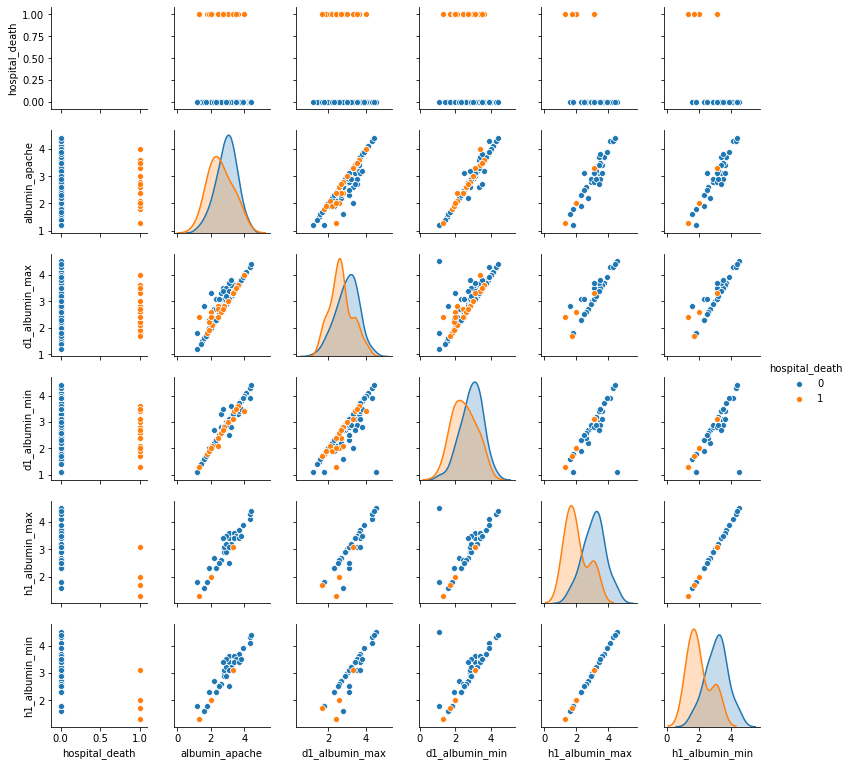

In [115]:
sns.pairplot(data = df[['hospital_death','albumin_apache','d1_albumin_max','d1_albumin_min','h1_albumin_max','h1_albumin_min']].sample(500, random_state =42), height=1.8, hue = 'hospital_death')

In [116]:
# General description

In [117]:
df[['hospital_death','albumin_apache','d1_albumin_max','d1_albumin_min','h1_albumin_max','h1_albumin_min']].describe()

,hospital_death,albumin_apache,d1_albumin_max,d1_albumin_min,h1_albumin_max,h1_albumin_min
count,81074.000000,32892.000000,37423.000000,37423.000000,7046.000000,7046.000000
mean,0.087759,2.910386,2.975288,2.904674,3.034417,3.033452
std,0.282946,0.682492,0.668160,0.670806,0.726089,0.726199
min,0.000000,1.200000,1.200000,1.100000,1.100000,1.100000
25%,0.000000,2.400000,2.500000,2.400000,2.600000,2.600000
50%,0.000000,2.900000,3.000000,2.900000,3.100000,3.100000
75%,0.000000,3.400000,3.500000,3.400000,3.500000,3.500000
max,1.000000,4.600000,4.600000,4.500000,4.700000,4.700000


In [118]:
# Description of the values of patients that died

In [119]:
df[['hospital_death','albumin_apache','d1_albumin_max','d1_albumin_min','h1_albumin_max','h1_albumin_min']][df['hospital_death']==1].describe()

,hospital_death,albumin_apache,d1_albumin_max,d1_albumin_min,h1_albumin_max,h1_albumin_min
count,7115.0,3770.000000,4234.000000,4234.000000,1029.000000,1029.000000
mean,1.0,2.529363,2.640104,2.517950,2.634985,2.633431
std,0.0,0.687395,0.686533,0.684515,0.746536,0.747102
min,1.0,1.200000,1.200000,1.100000,1.100000,1.100000
25%,1.0,2.000000,2.100000,2.000000,2.100000,2.100000
50%,1.0,2.500000,2.600000,2.500000,2.600000,2.600000
75%,1.0,3.000000,3.100000,3.000000,3.200000,3.200000
max,1.0,4.600000,4.600000,4.500000,4.700000,4.700000


In [120]:
# Description of the values of patients that survived

In [121]:
df[['hospital_death','albumin_apache','d1_albumin_max','d1_albumin_min','h1_albumin_max','h1_albumin_min']][df['hospital_death']==0].describe()

,hospital_death,albumin_apache,d1_albumin_max,d1_albumin_min,h1_albumin_max,h1_albumin_min
count,73959.0,29122.000000,33189.000000,33189.000000,6017.000000,6017.000000
mean,0.0,2.959711,3.018048,2.954009,3.102726,3.101861
std,0.0,0.666118,0.653540,0.652771,0.700137,0.700100
min,0.0,1.200000,1.200000,1.100000,1.100000,1.100000
25%,0.0,2.500000,2.600000,2.500000,2.600000,2.600000
50%,0.0,3.000000,3.100000,3.000000,3.100000,3.100000
75%,0.0,3.400000,3.500000,3.400000,3.600000,3.600000
max,0.0,4.600000,4.600000,4.500000,4.700000,4.700000


In [122]:
100*df[df['h1_albumin_max'].notnull()&df['h1_albumin_min'].notnull()]['hospital_death'].value_counts()/df[df['h1_albumin_max'].notnull()&df['h1_albumin_min'].notnull()]['hospital_death'].shape[0]

0    85.395969
1    14.604031
Name: hospital_death, dtype: float64

In [123]:
# we can realize that there if we analize only the people who did the h1_albumin test, the distribution
# of people who died and survived does not keep the same (91% to 9%). Maybe only the patients with worst conditions
# have to do this test?

In [124]:
# I will create a  new columns (binary) to indicate wether the patient did either the h1_albumin_max or
# h1_albumin_min test

#### Bilirubin

In [125]:
missing_data(df[['bilirubin_apache','d1_bilirubin_max','d1_bilirubin_min','h1_bilirubin_max','h1_bilirubin_min']])

,bilirubin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_bilirubin_max,h1_bilirubin_min
Total,51548,47707,47707,74747,74747
Percent,63.5814,58.8438,58.8438,92.196,92.196
Types,float64,float64,float64,float64,float64


In [126]:
# General description

In [127]:
df[['bilirubin_apache','d1_bilirubin_max','d1_bilirubin_min','h1_bilirubin_max','h1_bilirubin_min']].describe()

,bilirubin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_bilirubin_max,h1_bilirubin_min
count,29526.000000,33367.000000,33367.000000,6327.000000,6327.000000
mean,1.153658,1.143302,1.073032,1.098838,1.097969
std,2.179135,2.142413,2.029499,2.069296,2.068245
min,0.100000,0.200000,0.200000,0.200000,0.200000
25%,0.400000,0.400000,0.400000,0.400000,0.400000
50%,0.660000,0.600000,0.600000,0.600000,0.600000
75%,1.100000,1.100000,1.000000,1.100000,1.100000
max,51.000000,51.000000,51.000000,40.400000,40.400000


In [128]:
# Description of the values of patients that died

In [129]:
df[['bilirubin_apache','d1_bilirubin_max','d1_bilirubin_min','h1_bilirubin_max','h1_bilirubin_min']][df['hospital_death']==1].describe()

,bilirubin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_bilirubin_max,h1_bilirubin_min
count,3408.000000,3811.000000,3811.000000,924.000000,924.000000
mean,1.993037,1.962697,1.787295,1.779762,1.777706
std,3.768808,3.671592,3.411098,3.598745,3.594960
min,0.100000,0.200000,0.200000,0.200000,0.200000
25%,0.500000,0.500000,0.500000,0.500000,0.500000
50%,0.900000,0.900000,0.800000,0.800000,0.800000
75%,1.700000,1.700000,1.500000,1.500000,1.500000
max,38.400000,39.900000,38.400000,38.400000,38.400000


In [130]:
# Description of the values of patients that survived

In [131]:
df[['bilirubin_apache','d1_bilirubin_max','d1_bilirubin_min','h1_bilirubin_max','h1_bilirubin_min']][df['hospital_death']==0].describe()

,bilirubin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_bilirubin_max,h1_bilirubin_min
count,26118.000000,29556.000000,29556.000000,5403.000000,5403.000000
mean,1.044132,1.037648,0.980934,0.982389,0.981723
std,1.847003,1.829272,1.753779,1.645814,1.645778
min,0.100000,0.200000,0.200000,0.200000,0.200000
25%,0.400000,0.400000,0.400000,0.400000,0.400000
50%,0.600000,0.600000,0.600000,0.600000,0.600000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,51.000000,51.000000,51.000000,40.400000,40.400000


In [132]:
100*df[df['h1_bilirubin_max'].notnull()&df['h1_bilirubin_min'].notnull()]['hospital_death'].value_counts()/df[df['h1_albumin_max'].notnull()&df['h1_albumin_min'].notnull()]['hospital_death'].shape[0]

0    76.681805
1    13.113823
Name: hospital_death, dtype: float64

#### Bun

In [133]:
missing_data(df[['bun_apache','d1_bun_max','d1_bun_min','h1_bun_max','h1_bun_min']])

,bun_apache,d1_bun_max,d1_bun_min,h1_bun_max,h1_bun_min
Total,16348,8949,8949,66255,66255
Percent,20.1643,11.0381,11.0381,81.7216,81.7216
Types,float64,float64,float64,float64,float64


#### pao2fio2

In [134]:
missing_data(df[['fio2_apache','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_pao2fio2ratio_max',
'h1_pao2fio2ratio_min']])

,fio2_apache,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
Total,62427,58097,58097,70661,70661
Percent,77,71.6592,71.6592,87.1562,87.1562
Types,float64,float64,float64,float64,float64


In [135]:
# Apparently, the features that have the highest percentages of missing values are the exames during the first 
# hour of the unit stay

In [136]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [137]:
# I will disconsider the rows where apache_3j_bodysystem or apache_2_bodysystem is Nan

In [138]:
df = df[df['apache_3j_bodysystem'].notnull() & df['apache_2_bodysystem'].notnull()].copy()

In [139]:
# I will exclude the column hospital_admit_source, height and weight

In [140]:
df = df.drop(['hospital_admit_source', 'height', 'weight'], axis = 1).copy()

In [141]:
missing_data(df)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
Total,0,0,0,0,3164,2860,0,0,0,0,0,0,0,0,0,47808,0,0,0,0,51155,16202,15801,62005,0,0,0,0,8948,0,16814,0,0,62005,62005,62005,62005,0,15596,2905,42702,0,18734,59590,59590,19,19,777,777,4,4,59399,59399,7,7,1121,1121,31,31,148,148,59568,59568,15,15,769,769,1954,1954,65708,65708,2972,2972,6269,6269,2269,2269,65621,65621,3779,3779,7719,7719,3431,3431,3457,3457,65695,65695,2965,2965,6263,6263,19109,19109,43300,43300,47335,47335,8851,8851,11274,11274,8511,8511,4878,4878,12830,12830,10387,10387,9910,9910,50648,50648,59868,59868,11518,11518,8034,8034,8588,8588,11245,11245,73550,73550,74268,74268,65810,65810,66523,66523,65683,65683,46595,46595,66699,66699,63893,63893,64154,64154,50648,50648,73974,73974,66219,66219,63032,63032,63481,63481,66491,66491,51757,51757,52563,52563,51746,51746,57685,57685,66431,66431,66872,66872,66418,66418,70202,70202,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,3.92639,3.54914,0,0,0,0,0,0,0,0,0,59.3276,0,0,0,0,63.4811,20.106,19.6084,76.9455,0,0,0,0,11.1041,0,20.8654,0,0,76.9455,76.9455,76.9455,7

In [142]:
# I will create a list of variable names where there is at least one Nan value

In [143]:
imput = df.columns[df.isnull().any()].tolist() 
imput

['age',
 'bmi',
 'albumin_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'glucose_apache',
 'hematocrit_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_non

#### Impute values with the median

In [144]:
# for these features, I will replace the Nan values for the median. I will also save the variable names 
# and the median value in a dictionary, in case it will be necessary to impute values in the test set

In [145]:
# Create a dictionary with the median values



In [146]:
dic_values = {}
variables = list(df.columns)
not_numeric = ''
for i in variables:
    if type(df[i][0])==str:
          not_numeric = not_numeric + '\n' + i
    else:
        mediana = df[i].median() 
        dic_values[i]=mediana
print ('Categorical features: \n'+not_numeric )

Categorical features: 

ethnicity
gender
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [147]:
for i in imput:
    df[i].fillna(dic_values[i], inplace=True)
    

In [148]:
type(df['albumin_apache'][0])

numpy.float64

In [149]:
dic_values['albumin_apache']

2.9

In [150]:
dic_values

{'encounter_id': 65725.0,
 'patient_id': 65494.0,
 'hospital_id': 112.0,
 'hospital_death': 0.0,
 'age': 65.0,
 'bmi': 27.61097722,
 'elective_surgery': 0.0,
 'icu_id': 512.0,
 'pre_icu_los_days': 0.141666667,
 'readmission_status': 0.0,
 'albumin_apache': 2.9,
 'apache_2_diagnosis': 122.0,
 'apache_3j_diagnosis': 409.02,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'bilirubin_apache': 0.7,
 'bun_apache': 19.0,
 'creatinine_apache': 0.98,
 'fio2_apache': 0.5,
 'gcs_eyes_apache': 4.0,
 'gcs_motor_apache': 6.0,
 'gcs_unable_apache': 0.0,
 'gcs_verbal_apache': 5.0,
 'glucose_apache': 134.0,
 'heart_rate_apache': 104.0,
 'hematocrit_apache': 33.2,
 'intubated_apache': 0.0,
 'map_apache': 66.0,
 'paco2_apache': 40.1,
 'paco2_for_ph_apache': 40.1,
 'pao2_apache': 104.0,
 'ph_apache': 7.36,
 'resprate_apache': 28.0,
 'sodium_apache': 138.0,
 'temp_apache': 36.5,
 'urineoutput_apache': 1379.8944,
 'ventilated_apache': 0.0,
 'wbc_apache': 10.4,
 'd1_diasbp_invasive_max': 75.0,
 'd1_diasb

In [151]:
dic_values

{'encounter_id': 65725.0,
 'patient_id': 65494.0,
 'hospital_id': 112.0,
 'hospital_death': 0.0,
 'age': 65.0,
 'bmi': 27.61097722,
 'elective_surgery': 0.0,
 'icu_id': 512.0,
 'pre_icu_los_days': 0.141666667,
 'readmission_status': 0.0,
 'albumin_apache': 2.9,
 'apache_2_diagnosis': 122.0,
 'apache_3j_diagnosis': 409.02,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'bilirubin_apache': 0.7,
 'bun_apache': 19.0,
 'creatinine_apache': 0.98,
 'fio2_apache': 0.5,
 'gcs_eyes_apache': 4.0,
 'gcs_motor_apache': 6.0,
 'gcs_unable_apache': 0.0,
 'gcs_verbal_apache': 5.0,
 'glucose_apache': 134.0,
 'heart_rate_apache': 104.0,
 'hematocrit_apache': 33.2,
 'intubated_apache': 0.0,
 'map_apache': 66.0,
 'paco2_apache': 40.1,
 'paco2_for_ph_apache': 40.1,
 'pao2_apache': 104.0,
 'ph_apache': 7.36,
 'resprate_apache': 28.0,
 'sodium_apache': 138.0,
 'temp_apache': 36.5,
 'urineoutput_apache': 1379.8944,
 'ventilated_apache': 0.0,
 'wbc_apache': 10.4,
 'd1_diasbp_invasive_max': 75.0,
 'd1_diasb

In [152]:
# I will drop the following columns

In [153]:
exclude = ['hospital_id','encounter_id','patient_id']

In [154]:
df = df.drop(exclude,axis=1).copy()

### Creation of dummy variables

In [155]:
colunas_dummies = ['ethnicity','gender','icu_admit_source', 'icu_type','icu_stay_type','icu_stay_type', 
                   'apache_3j_bodysystem','apache_2_bodysystem']

df2 = pd.get_dummies(df,columns = colunas_dummies).copy()

In [156]:
df2.head()

,hospital_death,age,bmi,elective_surgery,icu_id,pre_icu_los_days,readmission_status,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genit

### Analysis of the test dataset

In [157]:
unlabeled.shape

(39308, 186)

In [158]:
missing_data(unlabeled)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
Total,0,0,0,39308,1654,1086,0,171,15,750,11948,115,0,0,0,0,0,764,24650,896,637,0,179,25292,7016,6896,29718,1163,1163,546,1163,4530,306,7747,179,301,29718,29718,29718,29718,449,6786,3376,15039,179,8330,27736,27736,104,104,598,598,111,111,27743,27743,100,100,753,753,294,294,195,195,27731,27731,104,104,598,598,2186,2186,30627,30627,1962,1962,4074,4074,1325,1325,30652,30652,1953,1953,4306,4306,2154,2154,2120,2120,30618,30618,1962,1962,4074,4074,8238,8238,22801,22801,23584,23584,3327,3327,3747,3747,3212,3212,2492,2492,5100,5100,4228,4228,4078,4078,23820,23820,27760,27760,5268,5268,3061,3061,3179,3179,4409,4409,35984,35984,36054,36054,30620,30620,30787,30787,30547,30547,23015,23015,31022,31022,30378,30378,30254,30254,23820,23820,34890,34890,30792,30792,29424,29424,29869,29869,30769,30769,25775,25775,25271,25271,25333,25333,27975,27975,32463,32463,32181,32181,32256,32256,33986,33986,5178,5178,179,179,179,179,179,179,179,179,896,896
Percent,0,0,0,100,4.20779,2.7628,0,0.435026,0

In [159]:
# There are also many features with missing values, some of them with more than 70% of missing. 
# I think it will be necessary to imput some values

## Creating the model

### train_test_split

In [160]:
# I will separate the dataset in train and test so that I can test the model

In [161]:
X = df2.drop(columns =['hospital_death'], axis=1)

In [162]:
y = df2['hospital_death']

In [163]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [164]:
X_train.shape

(64466, 220)

In [165]:
y_train.shape

(64466,)

In [166]:
X_test.shape

(16117, 220)

In [167]:
y_test.shape

(16117,)

### Oversampling

In [168]:
# In order to balance the data, I will use SMOTE oversampling

In [169]:
sm = SMOTE(random_state=42, ratio = 1.0)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

# ratio = 1, menas that I want the same proportion of target = 0 and target = 1
# default: k-neighbors = 5

In [170]:
X_train_bal.shape

(117558, 220)

In [171]:
y_train_bal.shape

(117558,)

In [172]:
# Checking if the target ('hospital_death') is really balanced

In [173]:
import collections, numpy
collections.Counter(y_train_bal)

Counter({0: 58779, 1: 58779})

In [174]:
X_train = X_train_bal
y_train = y_train_bal

## PCA

In [175]:
#Import the sklearn library
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fitting the train data
X_train = sc.fit_transform(X_train)
# transforming the test data
X_test = sc.transform(X_test)

In [176]:
# import PCA
# from sklearn.decomposition import PCA

In [177]:
for i in range (20,51,10):
    print ('Number of components = ', i)
    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train)
    print ('*'*30)
    print ('Noise Variance: ', pca.noise_variance_)
    print('Components: ', pca.components_)
    print ('*'*30)

Number of components =  20
******************************
Noise Variance:  0.5570291247617857
Components:  [[ 0.03600263 -0.00964624 -0.0126517  ... -0.0172801  -0.00217463
   0.00246532]
 [-0.00859892  0.0264539  -0.08055935 ...  0.00265356 -0.00930569
  -0.04534509]
 [-0.0104292  -0.02085601  0.09003691 ...  0.0109874   0.00415295
   0.03962856]
 ...
 [ 0.02925411  0.08346841  0.06218318 ... -0.07117907 -0.00911414
   0.08358158]
 [-0.02844489  0.03298278 -0.04487809 ... -0.02648576 -0.00717009
  -0.02882866]
 [-0.08754405 -0.05188501 -0.00868964 ...  0.06112967 -0.0167059
   0.01733943]]
******************************
Number of components =  30
******************************
Noise Variance:  0.4712558039442049
Components:  [[ 0.03600255 -0.00964621 -0.01265148 ... -0.01727986 -0.0021747
   0.00246539]
 [-0.00860094  0.02645636 -0.08056023 ...  0.00266008 -0.00929389
  -0.04533959]
 [-0.01044346 -0.02081914  0.09001719 ...  0.01096304  0.00416727
   0.03960425]
 ...
 [ 0.07261386 -0.

In [178]:
pca.n_components

50

In [179]:
X_train_pca[0]

array([-4.51380818,  0.97458607,  7.50067538,  2.72664931,  4.0761575 ,
        2.45054355,  4.54927784,  0.57303391,  8.74842161, -0.85871189,
        2.05846762,  0.44285669,  1.61757931, -2.03157735, -0.80394449,
        0.91052379, -1.45732567, -1.91268163, -1.28282028,  0.46614266,
        0.38162654,  1.63090655,  3.2926932 ,  0.70564848,  4.49960396,
        0.66354712, -1.92308001, -2.44771861,  1.63051079, -1.74811038,
       -0.48507489,  2.29790394,  2.35418432,  2.09580142, -2.7503457 ,
       -4.15909289,  1.52403368, -1.72974057, -0.19138915, -1.03190413,
        0.64650808,  1.40343782, -1.13944109,  3.44761558, -2.20670231,
       -2.68004808,  3.45055889, -0.4095959 ,  1.31919825,  0.65120006])

In [180]:
X_train_pca.shape

(117558, 50)

In [181]:
# transform the test data
X_test_pca = pca.transform(X_test)

In [182]:
X_test[0]  # show the first row

array([ 9.92777776e-01, -8.60918749e-01, -3.94114049e-01, -5.49026559e-01,
       -3.76593492e-01,  0.00000000e+00,  1.70961295e-01, -7.30103150e-01,
        1.53789679e-03, -4.32174668e-01, -2.04560125e-01, -1.93350206e-01,
       -4.90022671e-01, -4.29715363e-01, -3.18394799e-01, -1.97800158e+00,
       -2.51624988e+00, -1.52229013e-01, -1.52938566e+00, -1.02666075e+00,
        4.62850514e-02,  9.98403924e-02, -5.74703443e-01, -7.29425080e-01,
       -7.35174942e-02, -7.35174942e-02, -1.75783480e-01,  1.51319414e-01,
        2.29729495e-01, -2.02392279e-02,  1.58450244e-01, -6.74866946e-02,
       -9.96143365e-01,  8.56829212e-01, -1.88801834e+00, -9.72341426e-01,
       -5.37244809e-01, -3.70738430e-01, -5.45648360e-01, -3.78324106e-01,
       -8.52190153e-02,  5.59992605e-01, -9.25230643e-01, -2.73977312e-01,
       -1.02674915e+00, -4.28409330e-01, -1.03417620e+00, -4.35423182e-01,
        5.11337084e-02, -2.09072673e-01,  3.94534150e-01,  3.42195089e-01,
       -1.01697930e+00,  

In [183]:
X_test_pca[0]

array([ 2.40017812, -0.10045981, -0.90247593, -1.66157413, -0.95733841,
       -1.57084857, -1.65714043,  1.95766952, -0.55274052, -1.8075237 ,
        0.31237893,  0.65808757, -0.2469234 ,  2.50977763, -0.44045938,
       -1.27837892,  1.52171929, -0.80721039, -1.98519926, -0.50882356,
        2.60931376, -1.35514916, -0.55047166,  0.07068887, -0.85538769,
       -0.84698898, -1.35155634,  0.36797467,  1.34964594,  0.27665127,
        0.42817651,  0.01347454,  0.22096194, -0.33062342, -0.21957549,
       -0.27714718, -1.13667762, -0.86817502,  0.12312822, -1.67299912,
        0.46378003,  0.77721688, -1.42783507, -0.01332559, -0.98936431,
       -0.37817985,  1.17161057,  0.05260676,  1.7400337 ,  0.75900623])

In [184]:
# Which are the most important 'principal components'?

In [185]:
print(abs( pca.components_ ))

[[0.03600266 0.00964622 0.01265168 ... 0.01728013 0.00217464 0.00246529]
 [0.00859889 0.02645534 0.080559   ... 0.00265339 0.00930471 0.04534641]
 [0.01043155 0.02085845 0.09003536 ... 0.01098973 0.00415546 0.03963213]
 ...
 [0.01009654 0.03062287 0.00999095 ... 0.03827481 0.04308481 0.06274882]
 [0.01263115 0.07519301 0.02489603 ... 0.03097528 0.01803902 0.01979402]
 [0.05230554 0.02313181 0.04240874 ... 0.00674535 0.00593373 0.00328043]]


In [186]:
# What's the feature index of the most important ones?

In [187]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(50)]

In [188]:
most_important

[71,
 163,
 103,
 9,
 40,
 146,
 114,
 88,
 69,
 193,
 69,
 159,
 29,
 33,
 206,
 96,
 105,
 199,
 89,
 86,
 216,
 206,
 133,
 217,
 203,
 194,
 217,
 203,
 178,
 194,
 35,
 141,
 215,
 139,
 215,
 178,
 76,
 137,
 205,
 155,
 111,
 181,
 190,
 165,
 168,
 145,
 177,
 189,
 17,
 168]

In [189]:
X_train= X_train_pca
X_test = X_test_pca

In [190]:
# Machine Learning Pipelins

In [191]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

GaussianNB
****Results****
Accuracy: 0.778804988521437
Precision: 0.2392309564370893
Recall: 0.6912798874824191
DecisionTreeClassifier
****Results****
Accuracy: 0.7843271080225849
Precision: 0.20972300734878463
Recall: 0.5218002812939522
RandomForestClassifier
****Results****
Accuracy: 0.8675932245455109
Precision: 0.3273520853540252
Recall: 0.47468354430379744
GradientBoostingClassifier
****Results****
Accuracy: 0.8018862071105044
Precision: 0.27473925209870265
Recall: 0.759493670886076
LogisticRegression
****Results****
Accuracy: 0.8162188992988769
Precision: 0.2923408845738943
Recall: 0.7623066104078763


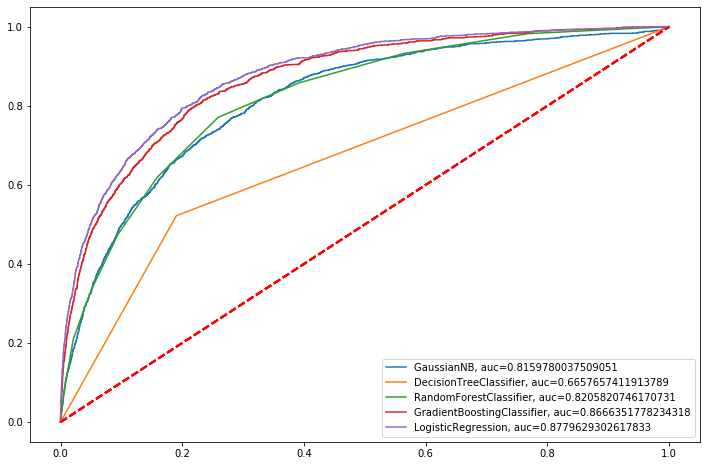

In [192]:
# importnado as bibliotecas com os modelos classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
# definindo uma lista com todos os classificadores
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression()] 

# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

# rotina para instanciar, predizer e medir os resultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

In [193]:
# Best AUC: Logistic Regression

## Fitting the model to the unlabeled set

In [ ]:
unlabeled.head()

In [ ]:
missing_data(unlabeled)

In [ ]:
df_test = unlabeled.copy()

###  Now I need to do all the steps that I did with the train test

#### Nan values mean no disease (0)

In [ ]:
for i in diagnosis:
    df_test[i].fillna(0, inplace=True)

#### Ethnicity: Nan will be considered as Other/Unknown

In [ ]:
df_test['ethnicity'].fillna('Other/Unknown', inplace=True)

####  Gender: Nan values replaced by the most frequent category

In [ ]:
df_test.gender.value_counts(dropna=False)

In [ ]:
df_test['gender'].fillna('M', inplace=True)

#### GCS_eyes, motor and verbal_apache: Nan values replaced by the most 'healthy' category

In [ ]:
df_test['gcs_eyes_apache'].fillna(4.0, inplace=True)

In [ ]:
df_test['gcs_motor_apache'].fillna(6.0, inplace=True)

In [ ]:
df_test['gcs_verbal_apache'].fillna(5.0, inplace=True)

#### Create columns to indicate wether there is a value for the test

In [ ]:
for feat in features:
    test(feat, df_test)

In [ ]:
df_test.head()

In [ ]:
missing_data(df_test)

In [ ]:
# I will drop the following columns

In [ ]:
exclude = ['hospital_id','encounter_id','patient_id','hospital_admit_source', 'weight', 'height']

In [ ]:
df_test = df_test.drop(exclude,axis=1).copy()

#### Impute values with the median

In [ ]:
imput_test = df_test.columns[df_test.isnull().any()].tolist() 
imput_test

In [ ]:
imput_test.remove('hospital_death')

In [ ]:
imput_test.remove('icu_admit_source')

In [ ]:
imput_test.remove('apache_3j_bodysystem')

In [ ]:
imput_test.remove('apache_2_bodysystem')

In [ ]:
for i in imput_test:
    df_test[i].fillna(dic_values[i], inplace=True)
    dic_values[i]=mediana

In [ ]:
df_test.columns[df_test.isnull().any()].tolist() 

In [ ]:
df_test['icu_admit_source'].value_counts(dropna=False)

In [ ]:
df_test['apache_3j_bodysystem'].value_counts(dropna=False)

In [ ]:
df_test['apache_2_bodysystem'].value_counts(dropna=False)

In [ ]:
df_test['icu_admit_source'].fillna('Accident & Emergency', inplace=True)
df_test['apache_3j_bodysystem'].fillna('Cardiovascular', inplace=True)
df_test['apache_2_bodysystem'].fillna('Cardiovascular', inplace=True)

### Creation of dummy variables

In [ ]:
colunas_dummies = ['ethnicity','gender','icu_admit_source', 'icu_type','icu_stay_type','icu_stay_type', 
                   'apache_3j_bodysystem','apache_2_bodysystem']

df_test = pd.get_dummies(df_test,columns = colunas_dummies).copy()

In [ ]:
df_test.head()

### Applying the model

In [ ]:
X_test_unlabeled = df_test.drop(columns =['hospital_death'], axis=1)

In [ ]:
X_test_unlabeled.shape

In [ ]:
# using scaling
X_test_unlabeled = sc.transform(X_test_unlabeled)

In [ ]:
# transform the test data
X_test_pca_unlabeled = pca.transform(X_test_unlabeled)

In [ ]:
y_pred_proba_unlabeled = clf.predict_proba(X_test_pca_unlabeled)[::,1]

In [ ]:
y_pred_proba_unlabeled

In [ ]:
unlabeled['hospital_death']=y_pred_proba_unlabeled

In [ ]:
unlabeled

In [ ]:
unlabeled[["encounter_id","hospital_death"]].head()

In [ ]:
unlabeled[["encounter_id","hospital_death"]].to_csv("submission3.0.csv",index=False)

## References

In [ ]:
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
# https://www.kaggle.com/rahullalu/home-credit-default-risk-eda
# https://www.kaggle.com/danofer/feature-selection-with-null-importances-wids